# 2. 多元线性回归

## 2.1 问题描述
现在有如下数据：

| 身高(cm) | 年龄（岁） | 性别 | 体重（kg） |
| -------- | ---------- | ---- | ---------- |
| 170      | 30         | 男   | 75         |
| 160      | 45         | 女   | 65         |
| 180      | 25         | 男   | 85         |
| 165      | 35         | 女   | 70         |
| 175      | 40         | 男   | 80         |
| 155      | 50         | 女   | 60         |
| 185      | 28         | 男   | 90         |
| 168      | 32         | 女   | 68         |
| 172      | 37         | 男   | 78         |
| 163      | 42         | 女   | 72         |
| 178      | 29         | 男   | 83         |
| 167      | 31         | 女   | 66         |

现在我们有12个样本数据。每个样本都包括了**身高、年龄和性别这三个自变量，以及相应的体重作为因变量**。要求预测给定身高、年龄和性别这三个自变量后其对应的体重？

## 2.2 多元线性回归模型
通过前面的分析，我们可以得到多元线性回归模型的关于$\beta$的计算公式：
$\beta = (X'X)^{-1}X'Y$
其中，X是自变量的矩阵，Y是因变量的矩阵。我们可以通过这个公式来计算出多元线性回归模型的系数。
这个公式中，X'是X的转置矩阵，$(X'X)^{-1}$是X'X的逆矩阵。
它是根据最小化误差平方和的原理推导出来的。

In [1]:
# 代码实现,导入numpy库，定义数据
import numpy as np

X = np.array(
    [[170, 30, 1], [160, 45, 0], [180, 25, 1], [165, 35, 0], [175, 40, 1], [155, 50, 0], [185, 28, 1], [168, 32, 0],
     [172, 37, 1], [163, 42, 0], [178, 29, 1], [167, 31, 0]])
Y = np.array([75, 65, 85, 70, 80, 60, 90, 68, 78, 72, 83, 66])

## 2.3 可视化数据

In [2]:
from pyecharts import options as opts
from pyecharts.charts import Scatter3D

data = X.tolist()  # 转换数据为列表格式
# 创建3D散点图
scatter3D = Scatter3D(init_opts=opts.InitOpts(width="800px", height="600px"))
scatter3D.add("", data)
# 设置3D散点图的全局选项
scatter3D.set_global_opts(
    title_opts=opts.TitleOpts(title="3D Scatter Plot"),
    visualmap_opts=opts.VisualMapOpts(
        max_=1,
        min_=0,
        range_color=["#313695", "#4575b4", "#74add1", "#abd9e9", "#e0f3f8", "#ffffbf", "#fee090", "#fdae61", "#f46d43",
                     "#d73027", "#a50026"],
    )
)
# 直接在Jupyter Notebook中显示图表
scatter3D.render_notebook()

In [3]:
print(X.shape[0], X.shape[1], type(X.shape[0]), type(X.shape[1]))

12 3 <class 'int'> <class 'int'>


In [4]:
# 根据公式计算beta（其中包括截距项）
def multi_linear_regression(X, Y):
    # np.hstack()是将两个矩阵水平合并，比如：
    # np.hstack([np.array([[1, 2, 3]]), np.array([[4, 5, 6]])]) = np.array([[1, 2, 3, 4, 5, 6]])
    # 这里是将X矩阵的第一列全部设置为1，用于计算截距项，X.shape[0]是X矩阵的行数
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    # ------------------------------------------------
    # 求解beta
    # np.linalg.inv()是求矩阵的逆
    # np.dot()是矩阵乘法
    # np.transpose()是矩阵转置
    # \beta = (X'X)^{-1}X'Y
    # ------------------------------------------------
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    return beta

In [5]:
# 计算beta
beta = multi_linear_regression(X, Y)
print(beta)

[-112.53822782    1.04161439    0.2448106     2.64148459]


## 2.4 回归方程为
## Y = beta[0] + beta[1] * X1 + beta[2] * X2 + beta[3] * X3
## 其中X1、X2、X3分别是身高、年龄和性别


In [6]:
print("回归方程为：Y = {:.2f} + {:.2f} * X1 + {:.2f} * X2 + {:.2f} * X3".format(beta[0], beta[1], beta[2], beta[3]))

回归方程为：Y = -112.54 + 1.04 * X1 + 0.24 * X2 + 2.64 * X3


## 2.5 预测

In [7]:
# 假设要预测的数据为：身高170cm，年龄35岁，性别男
X_test = np.array([170, 35, 1])
# 预测
Y_test = beta[0] + np.dot(X_test, beta[1:])
print("预测的体重为：{:.2f}kg".format(Y_test))

预测的体重为：75.75kg


In [8]:
# 假设要预测的数据为：身高160cm，年龄40岁，性别女
X_test = np.array([160, 40, 0])
# 预测
Y_test = beta[0] + np.dot(X_test, beta[1:])
print("预测的体重为：{:.2f}kg".format(Y_test))

预测的体重为：63.91kg


## 2.6 可视化回归平面——实际上是不可行的
- 为了更好理解不同个数自变量的图像，我们分别绘制一元一次方程和二元一次方程的图像，以便更好地理解。

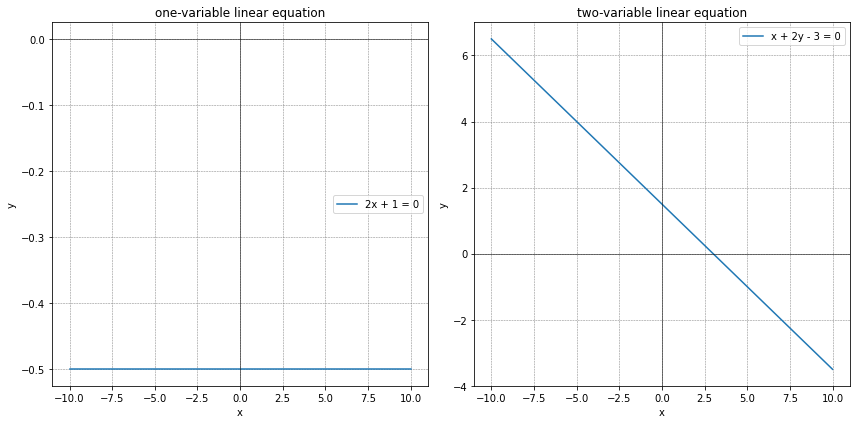

In [13]:
# 对于一元一次方程 2x+1=0，我将展示它在二维坐标系中的直线图
# 对于二元一次方程 x+2y−3=0，我将展示它在三维坐标系中的平面图
import matplotlib.pyplot as plt
import numpy as np

# 设置图像大小
plt.figure(figsize=(12, 6))
# 子图1：一元一次方程 2x + 1 = 0
plt.subplot(1, 2, 1)
x = np.linspace(-10, 10, 400)
y = -0.5 * np.ones_like(x)  # 解为x = -1/2
plt.plot(x, y, label='2x + 1 = 0')
plt.title('one-variable linear equation')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
# 子图2：二元一次方程 x + 2y - 3 = 0
plt.subplot(1, 2, 2)
x = np.linspace(-10, 10, 400)
y = (3 - x) / 2
plt.plot(x, y, label='x + 2y - 3 = 0')
plt.title('two-variable linear equation')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

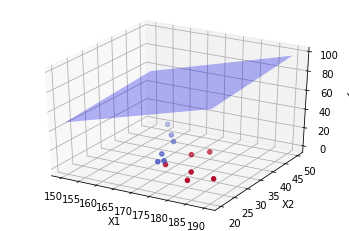

In [10]:
#假设只有两个自变量，我们可以绘制三维图像
import numpy as np
import matplotlib.pyplot as plt

# 定义原始数据点
X = np.array([
    [170, 30, 1], [160, 45, 0], [180, 25, 1], [165, 35, 0], [175, 40, 1], [155, 50, 0],
    [185, 28, 1], [168, 32, 0], [172, 37, 1], [163, 42, 0], [178, 29, 1], [167, 31, 0]
])
# 回归方程的系数
coefficients = [-112.54, 1.04, 0.24, 2.64]
# 生成X1, X2的网格
x1_range = np.linspace(150, 190, 20)
x2_range = np.linspace(20, 50, 20)
X1, X2 = np.meshgrid(x1_range, x2_range)
# 重新计算回归平面的Y值，不考虑X3的影响
Y_plane = coefficients[0] + coefficients[1] * X1 + coefficients[2] * X2
# 创建3D图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制原始数据点，使用X3值改变颜色
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 2], cmap='coolwarm', marker='o')
# 绘制回归平面
ax.plot_surface(X1, X2, Y_plane, color='b', alpha=0.3)
# 设置坐标轴标签
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

**但是我们有三个自变量，这说明它构成的图像是一个三维的图像，我们无法在二维平面上展示出来。因此，我们无法通过图像来直观地理解多元线性回归模型。**

## 2.7 模型评估——采用决定系数R方
计算公式为：
$R^2 = 1 - \frac{\sum_{i=1}^{n}(Y_i - \hat{Y_i})^2}{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}$
其中，$Y_i$是真实值，$\hat{Y_i}$是预测值，$\bar{Y}$是真实值的均值。  
R方的取值范围是0到1，R方越接近1，说明模型的拟合效果越好。


In [11]:
# 预测
Y_pred = beta[0] + np.dot(X, beta[1:])
print(Y_pred)

[74.52202148 65.136552   83.71411239 67.89651794 82.17819947 61.15253305
 89.65661616 70.28692931 78.31892448 67.52696337 82.61012602 69.00050432]


In [12]:
# 计算R方
def r2_score(Y, Y_pred):
    return 1 - np.sum((Y - Y_pred) ** 2) / np.sum((Y - np.mean(Y)) ** 2)
r2 = r2_score(Y, Y_pred)
print("R方为：{:.2f}".format(r2))

R方为：0.95


## 2.8 总结
- 多元线性回归模型是一种多元线性方程，它是通过多个自变量来预测因变量的一种模型。
- 通过结果来看，多元线性回归模型的R方为0.95，说明模型的拟合效果还是非常好的😂